In [89]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

os.chdir(os.path.expanduser("~/caffe/myProj"))
os.chdir('./cat-fancier/classifier/catnet/')

import sys
import caffe


In [90]:
# take an array of shape (n, height, width) or (n, height, width, channels)
#  and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)
def vis_square(data, padsize=1, padval=0):
    data -= data.min()
    data /= data.max()
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=(padval, padval))
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data)

In [161]:
MODEL_FILE = 'catnet_train_val_with_input_v1.prototxt'
PRETRAINED = 'catnet_train_quick_iter_1000.caffemodel'
MEAN_FILE  = 'data/catnet_mean.binaryproto'
IMAGE_FILE = 'images/cat.jpg'

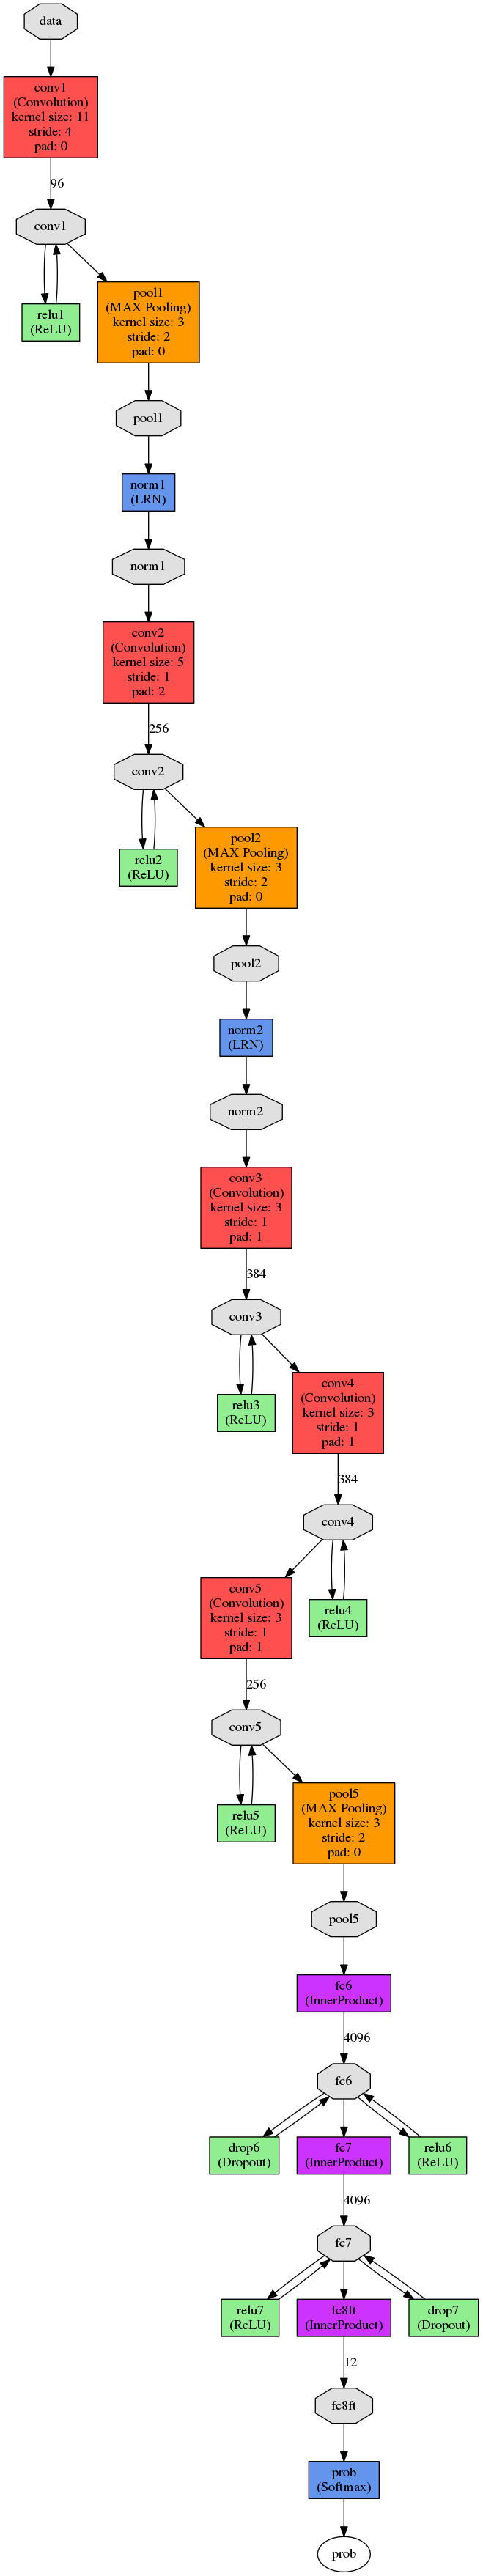

In [99]:
from google.protobuf import text_format
from caffe.draw import get_pydot_graph
from IPython.display import display, Image
from caffe.proto import caffe_pb2

net_param = caffe_pb2.NetParameter()
f = open(MODEL_FILE)
text_format.Merge(f.read(), net_param)
display(Image(get_pydot_graph(net_param,"TD").create_png()))


In [164]:
caffe.set_mode_cpu()
#net = caffe.Net(
#    MODEL_FILE,
#    PRETRAINED,
#    caffe.TEST)

#net = caffe.Classifier(
#    MODEL_FILE,
#    PRETRAINED)

blob = caffe.proto.caffe_pb2.BlobProto()
data = open( MEAN_FILE, 'rb' ).read()
blob.ParseFromString(data)
meanArr = np.array( caffe.io.blobproto_to_array(blob) )[0]

net = caffe.Classifier(MODEL_FILE, PRETRAINED,
                       mean=meanArr.mean(1).mean(1),
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

In [184]:
IMAGE_FILE = ""
#IMAGE_FILE = 'http://blogs.c.yimg.jp/res/blog-80-a3/coizoradaisuki/folder/942921/85/31576085/img_0?1351977921'
#IMAGE_FILE = "http://blogs.c.yimg.jp/res/blog-80-a3/coizoradaisuki/folder/942921/85/31576085/img_8?1351977921"
#IMAGE_FILE = "http://www.wallpaper-box.com/cat/1366768/images/cat49.jpg"
IMAGE_FILE = "http://farm8.staticflickr.com/7174/6636735913_3649811c6d_b.jpg"
#IMAGE_FILE = "http://pic.prepics-cdn.com/nekocute/14793340.jpeg"

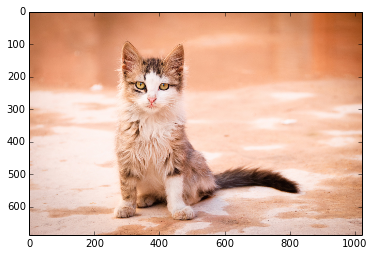

In [185]:
input_image = caffe.io.load_image(IMAGE_FILE)
plt.imshow(input_image)

prediction shape: (12,)
predicted class: 8


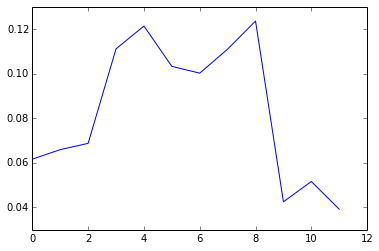

In [186]:
prediction = net.predict([input_image])  # predict takes any number of images, and formats them for the Caffe net automatically
print 'prediction shape:', prediction[0].shape
plt.plot(prediction[0])
print 'predicted class:', prediction[0].argmax()

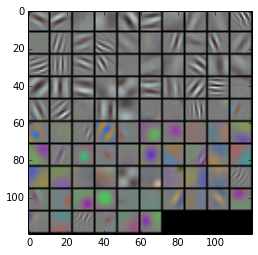

In [168]:
vis_square(net.params['conv1'][0].data.transpose(0,2,3,1))

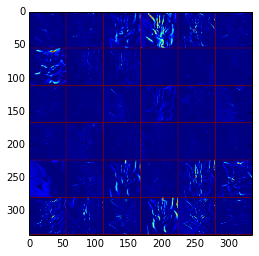

In [169]:
vis_square(net.blobs['conv1'].data[4,:36],padval=1)

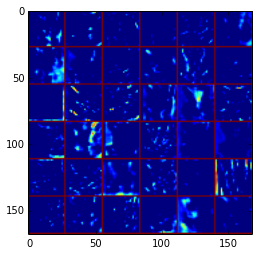

In [170]:
vis_square(net.blobs['conv2'].data[4,:36],padval=1)

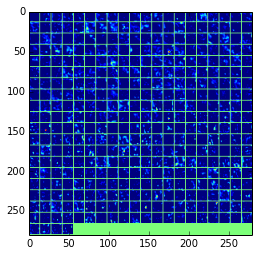

In [171]:
vis_square(net.blobs['conv4'].data[4],padval=0.5)

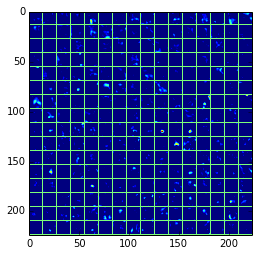

In [172]:
vis_square(net.blobs['conv5'].data[4],padval=0.5)

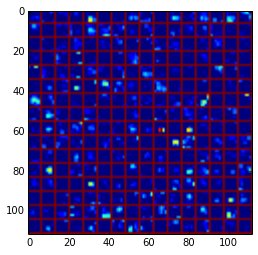

In [173]:
vis_square(net.blobs['pool5'].data[4],padval=1)

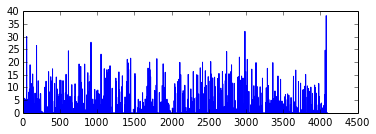

In [174]:
plt.subplot(2,1,1)
plt.plot(net.blobs['fc6'].data[4].flat)

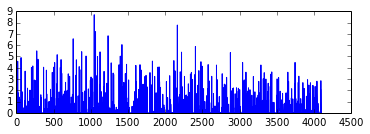

In [175]:
plt.subplot(2,1,1)
plt.plot(net.blobs['fc7'].data[4].flat)

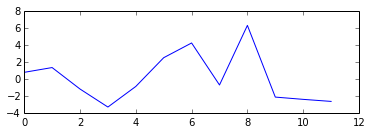

In [176]:
plt.subplot(2,1,1)
plt.plot(net.blobs['fc8ft'].data[4].flat)

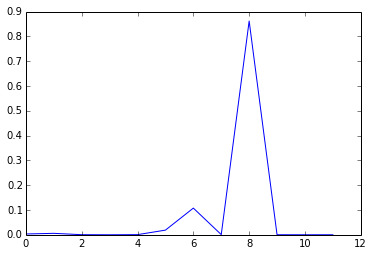

In [177]:
plt.plot(net.blobs['prob'].data[4])

In [ ]:
import lmdb
DB = './catnet_val_lmdb'
env = lmdb.open(DB)
env.stat()
